In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
from itertools import combinations

In [2]:
kwargs = {
    'linewidth': 45,
    'color': 'gray'
}

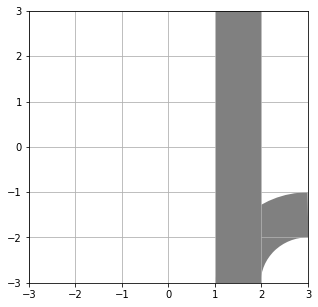

In [3]:
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(Arc((3,-3), 3, 3, theta1=90, theta2=180, **kwargs))
# ax.add_patch(Arc((1.5,0), 6, 0, theta1=90, theta2=180, **kwargs))
plt.axvline(1.5, **kwargs)
ax.set_ylim((-3,3))
ax.set_xlim((-3,3))
plt.grid()
plt.show()

In [4]:
from math import pi, cos, sin, tan

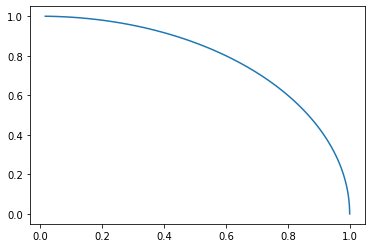

In [5]:
circlefunc = lambda r, x0, y0: (
    lambda theta: (r*cos(theta)+x0,
                   r*sin(theta)+y0
                  )
)
regular_circle = circlefunc(1,0,0)
points = list(zip(*[regular_circle(pi/2*i/100) for i in range(100)]))
plt.plot(points[0], points[1])

In [21]:
def plot_arc(r, x0, y0, theta1, theta2, c=None, alpha=None, linewidth=None):
    pts = list(zip(*[
        circlefunc(r, x0, y0)((theta2-theta1)*(i/100)+theta1) for i in range(100)
    ]))
    plt.plot(pts[0], pts[1], c=c, alpha=alpha, linewidth=linewidth)
    return pts

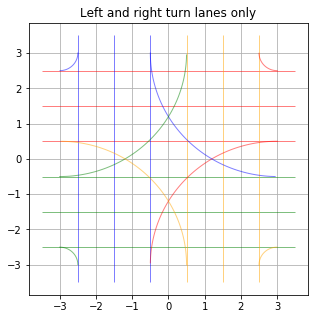

In [53]:
def lane_calc(lanes=3, turn_all=False, linewidth=30):

    plt.subplots(figsize=(5,5))
    
    turns = []
    r=3
    
    for i,c in enumerate(['r','b','g','orange']):
        k = i*pi/2

        # right turn
        for rad in ([.5, 1.5, 2.5] if turn_all else [.5]):
            turns.append(
                plot_arc(rad, r*cos(k)-r*sin(k), r*sin(k)+r*cos(k), k+3*pi/2, k+pi, c=c, alpha=.5, linewidth=linewidth)
            )

        # 
        if i%2==0:
            plt.hlines([0.5*cos(k), 1.5*cos(k), 2.5*cos(k)], xmin=-3.5, xmax=3.5, color=c, alpha=.5, linewidth=linewidth)
        else:
            plt.vlines([-0.5*sin(k), -1.5*sin(k), -2.5*sin(k)], ymin=-3.5, ymax=3.5, color=c, alpha=.5, linewidth=linewidth)

        # left turn
        for rad in ([3.5, 4.5, 5.5] if turn_all else [3.5]):
            turns.append(
                plot_arc(rad, r*cos(k)+r*sin(k), r*sin(k)-r*cos(k), k+pi/2, k+pi, c=c, alpha=.5, linewidth=linewidth)
            )
    
#     intersections = 0
#     for first,second in combinations(turns,2):
#         x1 = first[0]
#         y1 = first[1]
#         x2 = second[0]
#         y2 = second[1]
        
#         # Get the common range, from `max(x1[0], x2[0])` to `min(x1[-1], x2[-1])`   
#         x_begin = max(x1[0], x2[0])
#         x_end = min(x1[-1], x2[-1])

#         points1 = [t for t in zip(x1, y1) if x_begin<=t[0]<=x_end]
#         points2 = [t for t in zip(x2, y2) if x_begin<=t[0]<=x_end]

#         idx = 0
#         nrof_points = min(len(points1), len(points2))
#         while idx < nrof_points-1:
#             # Iterate over two line segments
#             y_min = min(points1[idx][1], points1[idx+1][1]) 
#             y_max = max(points1[idx+1][1], points2[idx+1][1]) 

#             x3 = np.linspace(points1[idx][0], points1[idx+1][0], 100)
#             y1_new = np.linspace(points1[idx][1], points1[idx+1][1], 100)
#             y2_new = np.linspace(points2[idx][1], points2[idx+1][1], 100)

#             tmp_idx = np.argwhere(np.isclose(y1_new, y2_new, atol=1e-3)).reshape(-1)
#             if len(tmp_idx) > 0:
#                 plt.scatter(x3[tmp_idx], y2_new[tmp_idx], c='r', marker='o', s=100)                 # Plot the cross point
#                 print(x3[tmp_idx], y2_new[tmp_idx])
#                 intersections +=1

#             idx += 1
    
#     print(intersections)

    # plt.legend()
    title = 'Turn all lanes' if turn_all else 'Left and right turn lanes only'
    plt.title(title)
    plt.grid()
    plt.savefig(title+'.png', dpi='figure')
    plt.show()

lane_calc(turn_all=False, linewidth=1)

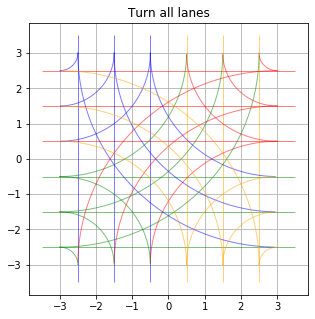

In [54]:
lane_calc(turn_all=True, linewidth=1)

In [2]:
import pandas as pd

In [19]:
lanes = pd.read_excel("Intersection Setup Input Format.xlsx", index_col=1)
lanes.head()

,IO,TAIL_X,TAIL_Y,MID_X,MID_Y,HEAD_X,HEAD_Y
ID,,,,,,,
N1,I,-5.0,60.0,-5.0,35.0,-5.0,10.0
N2,O,5.0,10.0,5.0,35.0,5.0,60.0
S1,I,2.5,-50.0,2.5,-25.0,2.5,0.0
S2,I,7.5,-50.0,7.5,-25.0,7.5,0.0
S3,O,-2.5,0.0,-2.5,-25.0,-2.5,-50.0


In [7]:
connects = pd.read_excel("Intersection Setup Input Format.xlsx", sheet_name="INTERSECTION TRAJECTORIES")
connects.head()

,TAIL_ID,HEAD_ID,MID_X,MID_Y
0,N1,S3,0,5
1,N1,S4,0,5
2,N1,E2,0,5
3,N1,W2,0,5
4,S1,N2,0,5


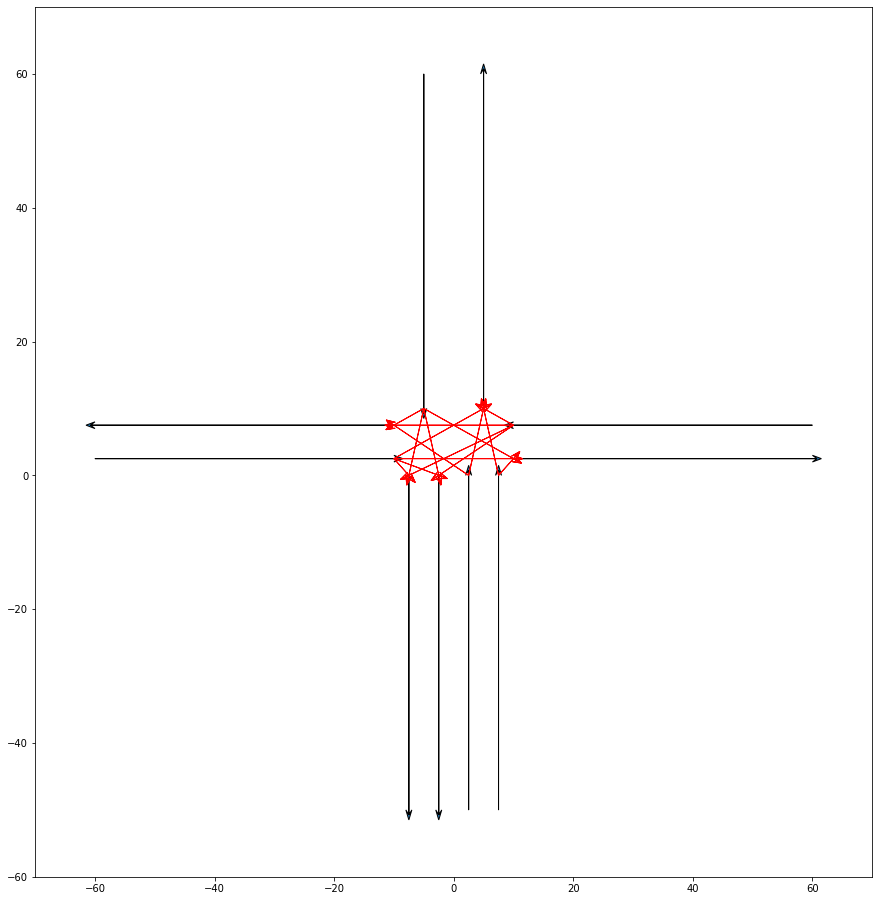

In [42]:
plt.figure(figsize=(15,16))
for i,r in lanes.iterrows():
    plt.xlim(-70, 70)
    plt.ylim(-60, 70)
    plt.arrow(r['TAIL_X'], r['TAIL_Y'], r['HEAD_X']-r['TAIL_X'], r["HEAD_Y"]-r['TAIL_Y'], head_width=1, overhang=.5)
    
for i,r in connects.iterrows():
    tail = lanes.loc[r['TAIL_ID'], ['HEAD_X', 'HEAD_Y']].values
    head = lanes.loc[r['HEAD_ID'], ['TAIL_X', 'TAIL_Y']].values
    plt.arrow(tail[0], tail[1], head[0]-tail[0], head[1]-tail[1], head_width=1, overhang=1, color='r')
    
plt.show()

In [11]:
class one():
    
    def __init__(self):
        self.a = 1
        print(self.a)

class oneone(one):
    b = 2
    
    def __init__(self):
        super().__init__()
        self.a += 69
        
        self.b += 1
        print(self.a,self.b)

oneone()

1
70 3
